<a href="https://colab.research.google.com/github/shallynagfase9/Decision-trees-Support-vector-machines/blob/main/Decision_Tree_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [5]:
df.shape

(20640, 9)

In [6]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [7]:
df.shape

(5160, 9)

In [8]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [9]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
539,1.9427,42.0,4.136667,1.030000,821.0,2.736667,37.78,-122.29
3854,2.6238,25.0,3.765978,1.086529,2328.0,2.289086,34.18,-118.43
17022,7.7364,24.0,6.576271,0.946328,969.0,2.737288,37.52,-122.31
11668,4.5083,34.0,5.233010,0.995146,575.0,2.791262,33.85,-118.00
8616,5.8518,23.0,5.751807,1.007229,1008.0,2.428916,33.87,-118.38


In [10]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [12]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [13]:
y_pred=regressor.predict(X_test)

In [14]:
y_pred

array([1.673, 1.841, 2.018, ..., 1.02 , 2.832, 1.325])

In [15]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [16]:
score

0.49761160705598584

In [17]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [18]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [19]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [20]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [21]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [22]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [23]:
%matplotlib inline

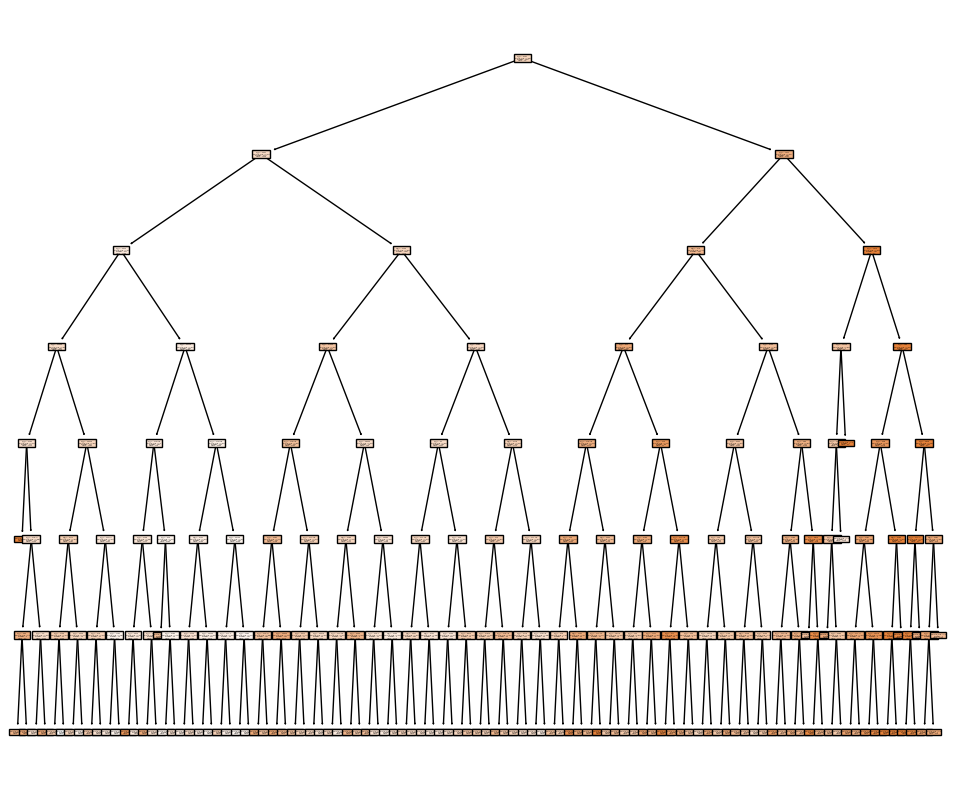

In [24]:
from sklearn import tree
plt.figure(figsize=(8,6))
tree.plot_tree(regressor,filled=True)
plt.show()

In [25]:
y_pred=regressorcv.predict(X_test)

In [26]:
r2_score(y_pred,y_test)

0.44225203321179396